### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('./house_prices.csv')
df.head()

house_id neighborhood  area  bedrooms  bathrooms      style    price
0      1112            B  1188         3          2      ranch   598291
1       491            B  3512         5          3  victorian  1744259
2      5952            B  1134         3          2      ranch   571669
3      3525            A  1940         4          2      ranch   493675
4      5108            B  2208         6          4  victorian  1101539

`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

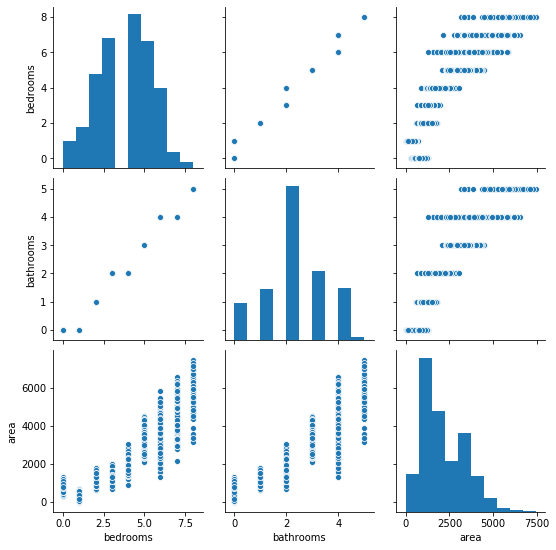

In [2]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [3]:
df['intercept'] = 1
mod = sm.OLS(df['price'], df[['bedrooms', 'bathrooms', 'area', 'intercept']])
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:05:14   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
b

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

In [4]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [5]:
vif

VIF Factor   features
0    7.327102  Intercept
1    5.458190       area
2   20.854484   bedrooms
3   19.006851  bathrooms

`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

In [6]:
df['intercept'] = 1
mod = sm.OLS(df['price'], df[['bedrooms', 'area', 'intercept']])
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:09:17   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1626.8306   5191.702      0.313      0.754   -8550.763    1.18e+04
a

In [8]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

VIF Factor   features
0    6.063895  Intercept
1    5.345400       area
2    5.345400   bedrooms
